In [1]:
from cpr.Nivel import Nivel
import cpr.information as info
import numpy as np
import os
import pandas as pd

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado

In [2]:
info.REMOTE['host'] = 'localhost'

In [3]:
self = Nivel(codigo=93,SimuBasin=True,**info.LOCAL)

/usr/local/lib/python2.7/dist-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


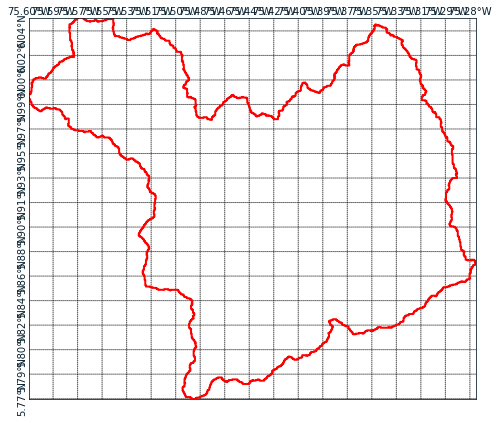

(<mpl_toolkits.basemap.Basemap at 0x7f05fceca6d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05fcf34e90>)

In [4]:
self.Plot_basin()

In [5]:
start = '2018-04-15 15:00'
end = '2018-04-15 23:00'

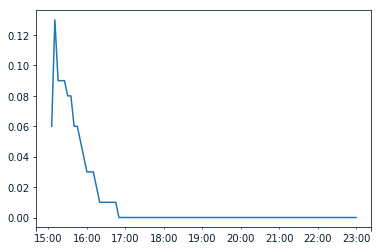

In [6]:
kwargs =  {
        'start':start,
        'end':end,
        'cuenca':self.nc_path,
        'rutaNc':self.radar_path,
        'rutaRes':self.rain_path+self.file_format(start,end),
        'dt':300,
        'umbral': 0.005,
        'verbose':True,
        'super_verbose':True,
        'old':None,
        'save_class':None,
        'store_true':None,
        'save_escenarios':None,
        'store_true':None,
       }

self.radar_rain(start,end).plot()

# título

el resultado de la investación del dron asesino...

In [7]:
self.level(start,end)

2018-04-15 15:00:00    50.38
2018-04-15 15:01:00    50.81
2018-04-15 15:02:00    50.59
2018-04-15 15:03:00    51.02
2018-04-15 15:04:00    50.59
2018-04-15 15:05:00    50.28
2018-04-15 15:06:00    51.02
2018-04-15 15:07:00    50.49
2018-04-15 15:08:00    50.70
2018-04-15 15:09:00    50.17
2018-04-15 15:10:00    50.91
2018-04-15 15:11:00    50.81
2018-04-15 15:12:00    50.38
2018-04-15 15:13:00    50.81
2018-04-15 15:14:00    51.02
2018-04-15 15:15:00    50.59
2018-04-15 15:16:00    50.49
2018-04-15 15:17:00    50.38
2018-04-15 15:18:00    50.70
2018-04-15 15:19:00    50.38
2018-04-15 15:20:00    50.38
2018-04-15 15:21:00    49.54
2018-04-15 15:22:00    50.07
2018-04-15 15:23:00    50.49
2018-04-15 15:24:00    49.65
2018-04-15 15:25:00    50.28
2018-04-15 15:26:00    49.75
2018-04-15 15:27:00    50.38
2018-04-15 15:28:00    50.17
2018-04-15 15:29:00    50.59
                       ...  
2018-04-15 22:31:00    48.59
2018-04-15 22:32:00    48.49
2018-04-15 22:33:00    49.12
2018-04-15 22:

In [8]:
self.sensor(start,end)

2018-04-15 15:00:00    906.02
2018-04-15 15:01:00    905.59
2018-04-15 15:02:00    905.81
2018-04-15 15:03:00    905.38
2018-04-15 15:04:00    905.81
2018-04-15 15:05:00    906.12
2018-04-15 15:06:00    905.38
2018-04-15 15:07:00    905.91
2018-04-15 15:08:00    905.70
2018-04-15 15:09:00    906.23
2018-04-15 15:10:00    905.49
2018-04-15 15:11:00    905.59
2018-04-15 15:12:00    906.02
2018-04-15 15:13:00    905.59
2018-04-15 15:14:00    905.38
2018-04-15 15:15:00    905.81
2018-04-15 15:16:00    905.91
2018-04-15 15:17:00    906.02
2018-04-15 15:18:00    905.70
2018-04-15 15:19:00    906.02
2018-04-15 15:20:00    906.02
2018-04-15 15:21:00    906.86
2018-04-15 15:22:00    906.33
2018-04-15 15:23:00    905.91
2018-04-15 15:24:00    906.75
2018-04-15 15:25:00    906.12
2018-04-15 15:26:00    906.65
2018-04-15 15:27:00    906.02
2018-04-15 15:28:00    906.23
2018-04-15 15:29:00    905.81
                        ...  
2018-04-15 22:31:00    907.81
2018-04-15 22:32:00    907.91
2018-04-15

In [10]:
import datetime
end = datetime.datetime.now()
start = end - datetime.timedelta(hours=3)

In [11]:
self.level(start,end)

2018-09-12 10:41:00    50.70
2018-09-12 10:42:00    49.65
2018-09-12 10:43:00    50.28
2018-09-12 10:44:00    50.17
2018-09-12 10:45:00    50.38
2018-09-12 10:46:00    49.65
2018-09-12 10:47:00    50.59
2018-09-12 10:48:00    50.38
2018-09-12 10:49:00    50.59
2018-09-12 10:50:00    49.65
2018-09-12 10:51:00    50.38
2018-09-12 10:52:00    50.59
2018-09-12 10:53:00    49.86
2018-09-12 10:54:00    49.96
2018-09-12 10:55:00    50.49
2018-09-12 10:56:00    50.81
2018-09-12 10:57:00    49.86
2018-09-12 10:58:00    51.12
2018-09-12 10:59:00    50.70
2018-09-12 11:00:00    50.17
2018-09-12 11:01:00    49.22
2018-09-12 11:02:00    50.49
2018-09-12 11:03:00    49.54
2018-09-12 11:04:00    50.59
2018-09-12 11:05:00    50.59
2018-09-12 11:06:00    50.07
2018-09-12 11:07:00    50.38
2018-09-12 11:08:00    50.59
2018-09-12 11:09:00    50.38
2018-09-12 11:10:00    50.38
                       ...  
2018-09-12 13:12:00    50.49
2018-09-12 13:13:00    50.17
2018-09-12 13:14:00    49.86
2018-09-12 13:

In [12]:
end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=20)
level = self.level_all(start,end)

In [13]:
self.insert_if_exist_update_level(level)

0:00:02.603532


### para saber si insertó bien todos deben ser true

In [14]:
self.level_all(start,end).fillna(0.0) == level.fillna(0.0)

codigo,98,99,96,93,94,92,90,101,104,106,...,260,265,273,196,283,290,317,316,284,326
2018-09-12 13:25:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 13:30:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 13:35:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 13:40:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 13:45:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


## recordar hacer constraint in data
ALTER TABLE myusers_hydrodata ADD UNIQUE (fk_id,fecha);

In [15]:
level = self.level(start,end,local=True)

In [16]:
level

fecha
2018-09-12 13:25:00    49.458
2018-09-12 13:30:00    49.100
2018-09-12 13:35:00    49.500
2018-09-12 13:40:00    49.162
Name: profundidad, dtype: float64

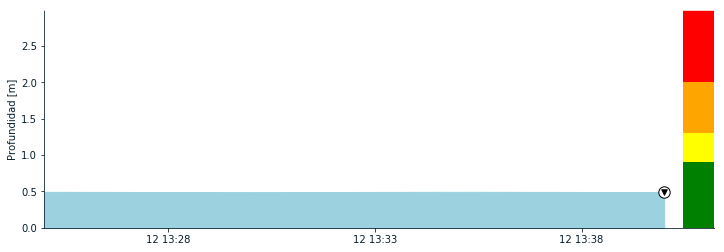

In [19]:
self.plot_level(self.level(start,end,local=True)/100.0)

In [18]:
self = Nivel(codigo=93,**info.LOCAL)

In [20]:
self.last_bat_id

2866

In [21]:
bat = self.last_bat

In [22]:
bat

,id,vertical,x,y,timestamp,updated,fk_id,user_id
0,9517,1,-2.00,3.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
1,9518,2,0.00,3.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
2,9519,3,0.87,2.83,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
3,9520,4,3.27,1.32,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
4,9521,5,4.33,0.93,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
5,9522,6,7.17,-0.37,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
6,9523,7,9.17,-0.14,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
7,9524,8,11.17,-0.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
8,9525,9,13.17,-0.14,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
9,9526,10,15.17,-0.18,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1


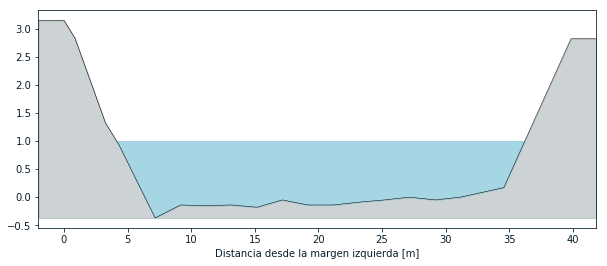

In [23]:
self.plot_section(self.last_bat,level=1.0)